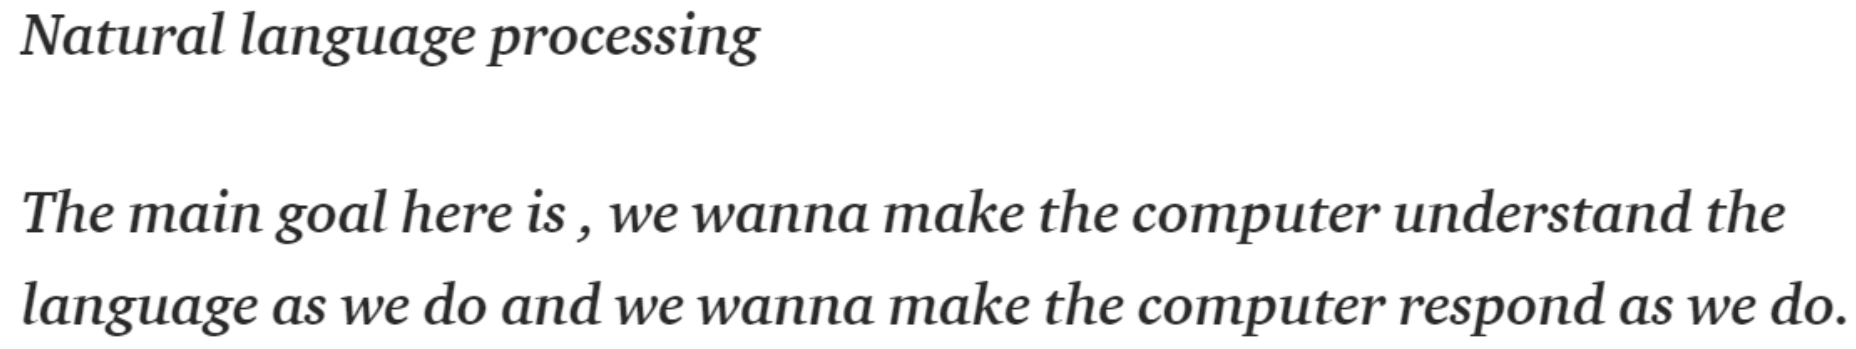

In [1]:
import numpy as np
import tensorflow as tf

### Data Preparation

Getting reading your corpus of text for training a model is a challenging job. Let's do it. NLTK packages and "re" library comes to our rescue to address this problem on larger corpus. Here we are going to see a simple text sample as an example.

In [2]:
# input corpus of text

raw_corpus = 'Asians like spicy food. Raja like spicy food.'
#raw_corpus = 'He is the king . The king is royal . She is the royal queen'
#raw_corpus = 'Well done!. Good work. Great effort. nice work. Excellent!. Weak. Poor effort!. not good. poor work. Could have done better.'

raw_corpus = raw_corpus.lower()

print(raw_corpus)

asians like spicy food. raja like spicy food.


In [4]:
# split corpus words into individual words

words = []

split_corpus = raw_corpus.split()

for word in split_corpus:
    word = word.replace(".","")
    if word != '.' and word != "":
        words.append(word)

words = set(words) # remove duplicates
        
print (words)

{'food', 'asians', 'raja', 'spicy', 'like'}


In [5]:
# convert words into integers

word2int = {}
int2word = {}

vocab_size = len(words)

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print (word2int)
print (int2word)

{'food': 0, 'asians': 1, 'raja': 2, 'like': 4, 'spicy': 3}
{0: 'food', 1: 'asians', 2: 'raja', 3: 'spicy', 4: 'like'}


In [6]:
# split words sentence wise

raw_sentence = raw_corpus.split('.')

sentences = []

for sentence in raw_sentence:
    sentences.append(sentence.split())
    
print (sentences)

[['asians', 'like', 'spicy', 'food'], ['raja', 'like', 'spicy', 'food'], []]


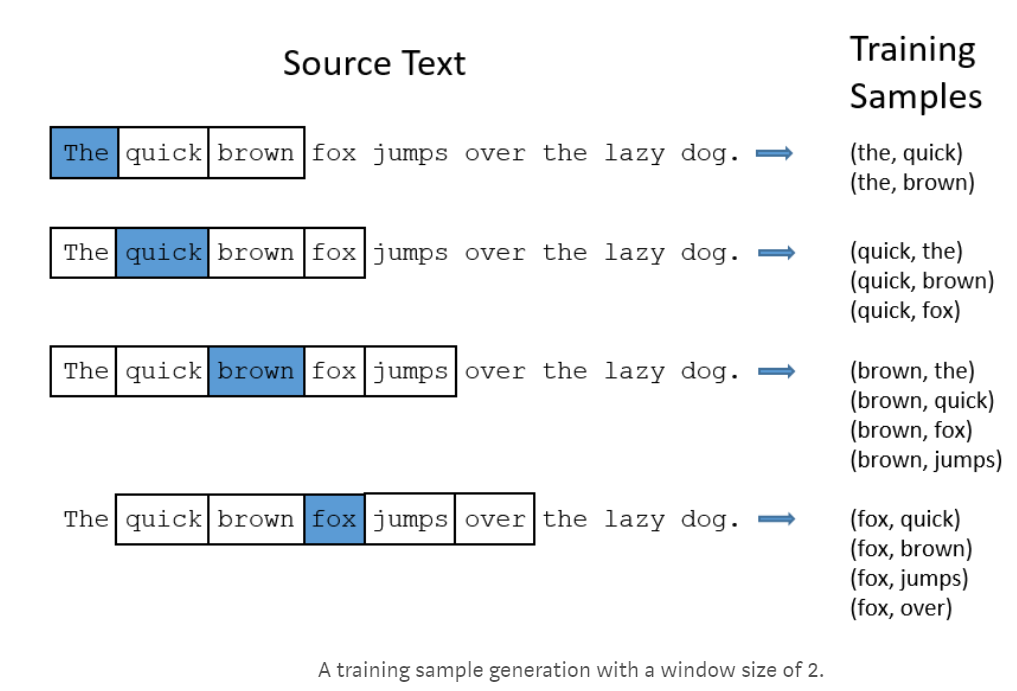

In [7]:
# generate training data with window size as 2

training_data = []
window_size = 2

for sentence in sentences:
    if len(sentence) > 0:
        for i, word in enumerate(sentence):
            idx_start = max(i - window_size, 0)
            idx_end = min(i + window_size, len(sentence)) + 1
            for nb_word in sentence[idx_start : idx_end]:
                if nb_word != word:
                    training_data.append([word, nb_word])

print(training_data)

# asians like spicy food. 
# raja like spicy food.

[['asians', 'like'], ['asians', 'spicy'], ['like', 'asians'], ['like', 'spicy'], ['like', 'food'], ['spicy', 'asians'], ['spicy', 'like'], ['spicy', 'food'], ['food', 'like'], ['food', 'spicy'], ['raja', 'like'], ['raja', 'spicy'], ['like', 'raja'], ['like', 'spicy'], ['like', 'food'], ['spicy', 'raja'], ['spicy', 'like'], ['spicy', 'food'], ['food', 'like'], ['food', 'spicy']]


In [8]:
# convert the input words into one-hot notation

def convert_to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

X_train = []
y_train = []

for data_word in training_data:
    X_train.append(convert_to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(convert_to_one_hot(word2int[ data_word[1] ], vocab_size))

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print ("X_train Shape:", X_train.shape)
print (X_train)
print ("y_train Shape:", y_train.shape)
print (y_train)

X_train Shape: (20, 5)
[[ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]
y_train Shape: (20, 5)
[[ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]]


### Prediction Model Using Tensorflow

#### Network Construction

In [9]:
# declare placeholders for X_train, y_train

X = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [10]:
# we require to embed the input training data into dimensions less(generally) than input

embedding_dim = 3 # assumption

# declaring variables and values for weights and bias from input to the hidden layer

w1 = tf.Variable(tf.random_normal([vocab_size, embedding_dim]))
b1 = tf.Variable(tf.random_normal([embedding_dim]))

# calculating the values that comes out from the hidden layer using matrix multiplication

hidden_representation = tf.add(tf.matmul(X, w1), b1)

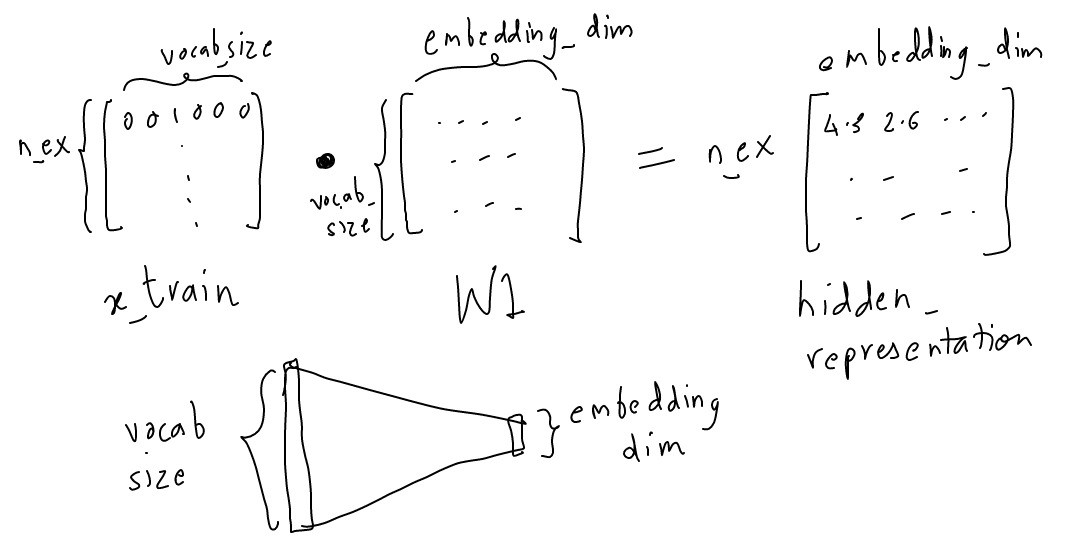

In [11]:
# declaring variables and values for weights and bias from hidden layer to the output(prediction)

w2 = tf.Variable(tf.random_normal([embedding_dim, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, w2), b2))

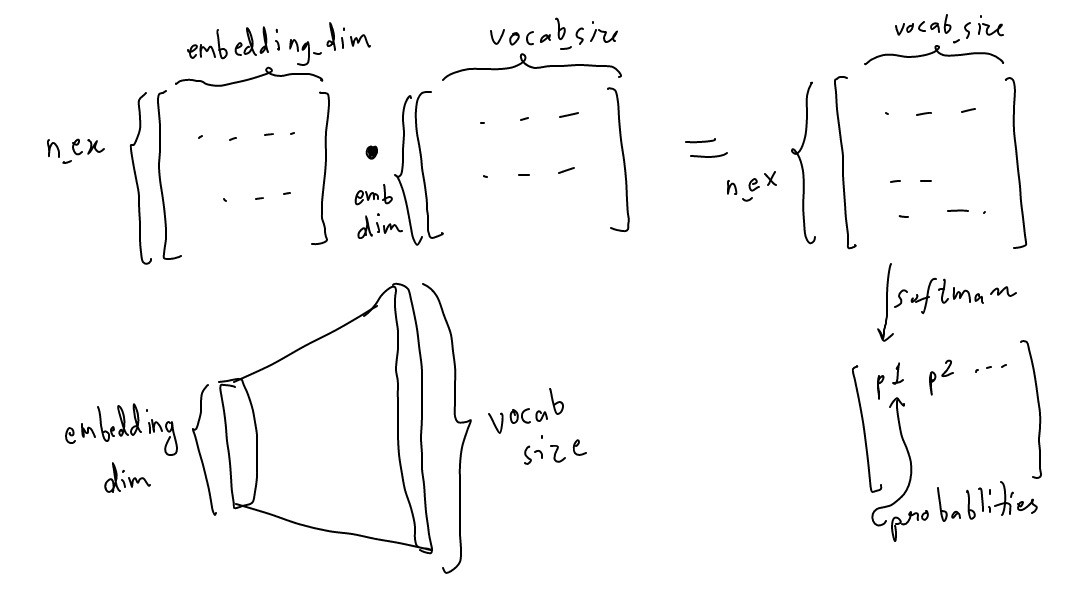

#### Running NN

In [12]:
# defining session variables

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# defining loss function for evaluation

cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define traning algorithm and parameters

training = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

iterations = 10000

# training for given iterations

for i in range(iterations):
    sess.run(training, feed_dict={X: X_train, y_label: y_train})
    print ('Iteration: ', i, 'Loss: ', sess.run(cross_entropy_loss, feed_dict={X: X_train, y_label: y_train}))

Iteration:  0 Loss:  1.9785
Iteration:  1 Loss:  1.92274
Iteration:  2 Loss:  1.87577
Iteration:  3 Loss:  1.83561
Iteration:  4 Loss:  1.80086
Iteration:  5 Loss:  1.77049
Iteration:  6 Loss:  1.74372
Iteration:  7 Loss:  1.71992
Iteration:  8 Loss:  1.69863
Iteration:  9 Loss:  1.67945
Iteration:  10 Loss:  1.66208
Iteration:  11 Loss:  1.64625
Iteration:  12 Loss:  1.63175
Iteration:  13 Loss:  1.61841
Iteration:  14 Loss:  1.60609
Iteration:  15 Loss:  1.59464
Iteration:  16 Loss:  1.58398
Iteration:  17 Loss:  1.57401
Iteration:  18 Loss:  1.56465
Iteration:  19 Loss:  1.55584
Iteration:  20 Loss:  1.54752
Iteration:  21 Loss:  1.53964
Iteration:  22 Loss:  1.53216
Iteration:  23 Loss:  1.52504
Iteration:  24 Loss:  1.51824
Iteration:  25 Loss:  1.51175
Iteration:  26 Loss:  1.50553
Iteration:  27 Loss:  1.49955
Iteration:  28 Loss:  1.49381
Iteration:  29 Loss:  1.48828
Iteration:  30 Loss:  1.48294
Iteration:  31 Loss:  1.47779
Iteration:  32 Loss:  1.4728
Iteration:  33 Loss:  

Iteration:  380 Loss:  1.10289
Iteration:  381 Loss:  1.10274
Iteration:  382 Loss:  1.10259
Iteration:  383 Loss:  1.10244
Iteration:  384 Loss:  1.10229
Iteration:  385 Loss:  1.10214
Iteration:  386 Loss:  1.10199
Iteration:  387 Loss:  1.10185
Iteration:  388 Loss:  1.1017
Iteration:  389 Loss:  1.10156
Iteration:  390 Loss:  1.10142
Iteration:  391 Loss:  1.10128
Iteration:  392 Loss:  1.10114
Iteration:  393 Loss:  1.101
Iteration:  394 Loss:  1.10086
Iteration:  395 Loss:  1.10072
Iteration:  396 Loss:  1.10059
Iteration:  397 Loss:  1.10045
Iteration:  398 Loss:  1.10032
Iteration:  399 Loss:  1.10019
Iteration:  400 Loss:  1.10005
Iteration:  401 Loss:  1.09992
Iteration:  402 Loss:  1.0998
Iteration:  403 Loss:  1.09967
Iteration:  404 Loss:  1.09954
Iteration:  405 Loss:  1.09941
Iteration:  406 Loss:  1.09929
Iteration:  407 Loss:  1.09916
Iteration:  408 Loss:  1.09904
Iteration:  409 Loss:  1.09892
Iteration:  410 Loss:  1.0988
Iteration:  411 Loss:  1.09868
Iteration:  4

Iteration:  648 Loss:  1.08483
Iteration:  649 Loss:  1.0848
Iteration:  650 Loss:  1.08478
Iteration:  651 Loss:  1.08475
Iteration:  652 Loss:  1.08473
Iteration:  653 Loss:  1.0847
Iteration:  654 Loss:  1.08467
Iteration:  655 Loss:  1.08465
Iteration:  656 Loss:  1.08462
Iteration:  657 Loss:  1.0846
Iteration:  658 Loss:  1.08457
Iteration:  659 Loss:  1.08454
Iteration:  660 Loss:  1.08452
Iteration:  661 Loss:  1.08449
Iteration:  662 Loss:  1.08447
Iteration:  663 Loss:  1.08444
Iteration:  664 Loss:  1.08442
Iteration:  665 Loss:  1.08439
Iteration:  666 Loss:  1.08437
Iteration:  667 Loss:  1.08435
Iteration:  668 Loss:  1.08432
Iteration:  669 Loss:  1.0843
Iteration:  670 Loss:  1.08427
Iteration:  671 Loss:  1.08425
Iteration:  672 Loss:  1.08422
Iteration:  673 Loss:  1.0842
Iteration:  674 Loss:  1.08418
Iteration:  675 Loss:  1.08415
Iteration:  676 Loss:  1.08413
Iteration:  677 Loss:  1.08411
Iteration:  678 Loss:  1.08408
Iteration:  679 Loss:  1.08406
Iteration:  6

Iteration:  915 Loss:  1.08052
Iteration:  916 Loss:  1.08051
Iteration:  917 Loss:  1.0805
Iteration:  918 Loss:  1.08049
Iteration:  919 Loss:  1.08048
Iteration:  920 Loss:  1.08047
Iteration:  921 Loss:  1.08046
Iteration:  922 Loss:  1.08045
Iteration:  923 Loss:  1.08044
Iteration:  924 Loss:  1.08043
Iteration:  925 Loss:  1.08042
Iteration:  926 Loss:  1.08041
Iteration:  927 Loss:  1.0804
Iteration:  928 Loss:  1.0804
Iteration:  929 Loss:  1.08039
Iteration:  930 Loss:  1.08038
Iteration:  931 Loss:  1.08037
Iteration:  932 Loss:  1.08036
Iteration:  933 Loss:  1.08035
Iteration:  934 Loss:  1.08034
Iteration:  935 Loss:  1.08033
Iteration:  936 Loss:  1.08032
Iteration:  937 Loss:  1.08031
Iteration:  938 Loss:  1.0803
Iteration:  939 Loss:  1.0803
Iteration:  940 Loss:  1.08029
Iteration:  941 Loss:  1.08028
Iteration:  942 Loss:  1.08027
Iteration:  943 Loss:  1.08026
Iteration:  944 Loss:  1.08025
Iteration:  945 Loss:  1.08024
Iteration:  946 Loss:  1.08023
Iteration:  9

Iteration:  1194 Loss:  1.07866
Iteration:  1195 Loss:  1.07866
Iteration:  1196 Loss:  1.07865
Iteration:  1197 Loss:  1.07865
Iteration:  1198 Loss:  1.07864
Iteration:  1199 Loss:  1.07864
Iteration:  1200 Loss:  1.07863
Iteration:  1201 Loss:  1.07863
Iteration:  1202 Loss:  1.07862
Iteration:  1203 Loss:  1.07862
Iteration:  1204 Loss:  1.07861
Iteration:  1205 Loss:  1.07861
Iteration:  1206 Loss:  1.07861
Iteration:  1207 Loss:  1.0786
Iteration:  1208 Loss:  1.0786
Iteration:  1209 Loss:  1.07859
Iteration:  1210 Loss:  1.07859
Iteration:  1211 Loss:  1.07858
Iteration:  1212 Loss:  1.07858
Iteration:  1213 Loss:  1.07857
Iteration:  1214 Loss:  1.07857
Iteration:  1215 Loss:  1.07857
Iteration:  1216 Loss:  1.07856
Iteration:  1217 Loss:  1.07856
Iteration:  1218 Loss:  1.07855
Iteration:  1219 Loss:  1.07855
Iteration:  1220 Loss:  1.07854
Iteration:  1221 Loss:  1.07854
Iteration:  1222 Loss:  1.07854
Iteration:  1223 Loss:  1.07853
Iteration:  1224 Loss:  1.07853
Iteration:

Iteration:  1459 Loss:  1.07773
Iteration:  1460 Loss:  1.07773
Iteration:  1461 Loss:  1.07773
Iteration:  1462 Loss:  1.07772
Iteration:  1463 Loss:  1.07772
Iteration:  1464 Loss:  1.07772
Iteration:  1465 Loss:  1.07771
Iteration:  1466 Loss:  1.07771
Iteration:  1467 Loss:  1.07771
Iteration:  1468 Loss:  1.07771
Iteration:  1469 Loss:  1.0777
Iteration:  1470 Loss:  1.0777
Iteration:  1471 Loss:  1.0777
Iteration:  1472 Loss:  1.0777
Iteration:  1473 Loss:  1.07769
Iteration:  1474 Loss:  1.07769
Iteration:  1475 Loss:  1.07769
Iteration:  1476 Loss:  1.07769
Iteration:  1477 Loss:  1.07768
Iteration:  1478 Loss:  1.07768
Iteration:  1479 Loss:  1.07768
Iteration:  1480 Loss:  1.07768
Iteration:  1481 Loss:  1.07767
Iteration:  1482 Loss:  1.07767
Iteration:  1483 Loss:  1.07767
Iteration:  1484 Loss:  1.07767
Iteration:  1485 Loss:  1.07766
Iteration:  1486 Loss:  1.07766
Iteration:  1487 Loss:  1.07766
Iteration:  1488 Loss:  1.07765
Iteration:  1489 Loss:  1.07765
Iteration:  

Iteration:  1760 Loss:  1.0771
Iteration:  1761 Loss:  1.0771
Iteration:  1762 Loss:  1.0771
Iteration:  1763 Loss:  1.07709
Iteration:  1764 Loss:  1.07709
Iteration:  1765 Loss:  1.07709
Iteration:  1766 Loss:  1.07709
Iteration:  1767 Loss:  1.07709
Iteration:  1768 Loss:  1.07709
Iteration:  1769 Loss:  1.07708
Iteration:  1770 Loss:  1.07708
Iteration:  1771 Loss:  1.07708
Iteration:  1772 Loss:  1.07708
Iteration:  1773 Loss:  1.07708
Iteration:  1774 Loss:  1.07708
Iteration:  1775 Loss:  1.07707
Iteration:  1776 Loss:  1.07707
Iteration:  1777 Loss:  1.07707
Iteration:  1778 Loss:  1.07707
Iteration:  1779 Loss:  1.07707
Iteration:  1780 Loss:  1.07707
Iteration:  1781 Loss:  1.07706
Iteration:  1782 Loss:  1.07706
Iteration:  1783 Loss:  1.07706
Iteration:  1784 Loss:  1.07706
Iteration:  1785 Loss:  1.07706
Iteration:  1786 Loss:  1.07706
Iteration:  1787 Loss:  1.07706
Iteration:  1788 Loss:  1.07705
Iteration:  1789 Loss:  1.07705
Iteration:  1790 Loss:  1.07705
Iteration: 

Iteration:  2041 Loss:  1.07672
Iteration:  2042 Loss:  1.07672
Iteration:  2043 Loss:  1.07671
Iteration:  2044 Loss:  1.07671
Iteration:  2045 Loss:  1.07671
Iteration:  2046 Loss:  1.07671
Iteration:  2047 Loss:  1.07671
Iteration:  2048 Loss:  1.07671
Iteration:  2049 Loss:  1.07671
Iteration:  2050 Loss:  1.07671
Iteration:  2051 Loss:  1.07671
Iteration:  2052 Loss:  1.0767
Iteration:  2053 Loss:  1.0767
Iteration:  2054 Loss:  1.0767
Iteration:  2055 Loss:  1.0767
Iteration:  2056 Loss:  1.0767
Iteration:  2057 Loss:  1.0767
Iteration:  2058 Loss:  1.0767
Iteration:  2059 Loss:  1.0767
Iteration:  2060 Loss:  1.0767
Iteration:  2061 Loss:  1.07669
Iteration:  2062 Loss:  1.07669
Iteration:  2063 Loss:  1.07669
Iteration:  2064 Loss:  1.07669
Iteration:  2065 Loss:  1.07669
Iteration:  2066 Loss:  1.07669
Iteration:  2067 Loss:  1.07669
Iteration:  2068 Loss:  1.07669
Iteration:  2069 Loss:  1.07669
Iteration:  2070 Loss:  1.07668
Iteration:  2071 Loss:  1.07668
Iteration:  2072 

Iteration:  2313 Loss:  1.07645
Iteration:  2314 Loss:  1.07645
Iteration:  2315 Loss:  1.07645
Iteration:  2316 Loss:  1.07645
Iteration:  2317 Loss:  1.07645
Iteration:  2318 Loss:  1.07645
Iteration:  2319 Loss:  1.07645
Iteration:  2320 Loss:  1.07645
Iteration:  2321 Loss:  1.07645
Iteration:  2322 Loss:  1.07645
Iteration:  2323 Loss:  1.07645
Iteration:  2324 Loss:  1.07645
Iteration:  2325 Loss:  1.07644
Iteration:  2326 Loss:  1.07644
Iteration:  2327 Loss:  1.07644
Iteration:  2328 Loss:  1.07644
Iteration:  2329 Loss:  1.07644
Iteration:  2330 Loss:  1.07644
Iteration:  2331 Loss:  1.07644
Iteration:  2332 Loss:  1.07644
Iteration:  2333 Loss:  1.07644
Iteration:  2334 Loss:  1.07644
Iteration:  2335 Loss:  1.07644
Iteration:  2336 Loss:  1.07644
Iteration:  2337 Loss:  1.07643
Iteration:  2338 Loss:  1.07643
Iteration:  2339 Loss:  1.07643
Iteration:  2340 Loss:  1.07643
Iteration:  2341 Loss:  1.07643
Iteration:  2342 Loss:  1.07643
Iteration:  2343 Loss:  1.07643
Iteratio

Iteration:  2605 Loss:  1.07625
Iteration:  2606 Loss:  1.07625
Iteration:  2607 Loss:  1.07625
Iteration:  2608 Loss:  1.07625
Iteration:  2609 Loss:  1.07624
Iteration:  2610 Loss:  1.07624
Iteration:  2611 Loss:  1.07624
Iteration:  2612 Loss:  1.07624
Iteration:  2613 Loss:  1.07624
Iteration:  2614 Loss:  1.07624
Iteration:  2615 Loss:  1.07624
Iteration:  2616 Loss:  1.07624
Iteration:  2617 Loss:  1.07624
Iteration:  2618 Loss:  1.07624
Iteration:  2619 Loss:  1.07624
Iteration:  2620 Loss:  1.07624
Iteration:  2621 Loss:  1.07624
Iteration:  2622 Loss:  1.07624
Iteration:  2623 Loss:  1.07624
Iteration:  2624 Loss:  1.07624
Iteration:  2625 Loss:  1.07623
Iteration:  2626 Loss:  1.07623
Iteration:  2627 Loss:  1.07623
Iteration:  2628 Loss:  1.07623
Iteration:  2629 Loss:  1.07623
Iteration:  2630 Loss:  1.07623
Iteration:  2631 Loss:  1.07623
Iteration:  2632 Loss:  1.07623
Iteration:  2633 Loss:  1.07623
Iteration:  2634 Loss:  1.07623
Iteration:  2635 Loss:  1.07623
Iteratio

Iteration:  2882 Loss:  1.0761
Iteration:  2883 Loss:  1.0761
Iteration:  2884 Loss:  1.0761
Iteration:  2885 Loss:  1.0761
Iteration:  2886 Loss:  1.07609
Iteration:  2887 Loss:  1.07609
Iteration:  2888 Loss:  1.07609
Iteration:  2889 Loss:  1.07609
Iteration:  2890 Loss:  1.07609
Iteration:  2891 Loss:  1.07609
Iteration:  2892 Loss:  1.07609
Iteration:  2893 Loss:  1.07609
Iteration:  2894 Loss:  1.07609
Iteration:  2895 Loss:  1.07609
Iteration:  2896 Loss:  1.07609
Iteration:  2897 Loss:  1.07609
Iteration:  2898 Loss:  1.07609
Iteration:  2899 Loss:  1.07609
Iteration:  2900 Loss:  1.07609
Iteration:  2901 Loss:  1.07609
Iteration:  2902 Loss:  1.07609
Iteration:  2903 Loss:  1.07609
Iteration:  2904 Loss:  1.07609
Iteration:  2905 Loss:  1.07609
Iteration:  2906 Loss:  1.07609
Iteration:  2907 Loss:  1.07609
Iteration:  2908 Loss:  1.07608
Iteration:  2909 Loss:  1.07608
Iteration:  2910 Loss:  1.07608
Iteration:  2911 Loss:  1.07608
Iteration:  2912 Loss:  1.07608
Iteration:  

Iteration:  3157 Loss:  1.07598
Iteration:  3158 Loss:  1.07598
Iteration:  3159 Loss:  1.07598
Iteration:  3160 Loss:  1.07598
Iteration:  3161 Loss:  1.07598
Iteration:  3162 Loss:  1.07598
Iteration:  3163 Loss:  1.07598
Iteration:  3164 Loss:  1.07598
Iteration:  3165 Loss:  1.07598
Iteration:  3166 Loss:  1.07598
Iteration:  3167 Loss:  1.07598
Iteration:  3168 Loss:  1.07598
Iteration:  3169 Loss:  1.07597
Iteration:  3170 Loss:  1.07597
Iteration:  3171 Loss:  1.07597
Iteration:  3172 Loss:  1.07597
Iteration:  3173 Loss:  1.07597
Iteration:  3174 Loss:  1.07597
Iteration:  3175 Loss:  1.07597
Iteration:  3176 Loss:  1.07597
Iteration:  3177 Loss:  1.07597
Iteration:  3178 Loss:  1.07597
Iteration:  3179 Loss:  1.07597
Iteration:  3180 Loss:  1.07597
Iteration:  3181 Loss:  1.07597
Iteration:  3182 Loss:  1.07597
Iteration:  3183 Loss:  1.07597
Iteration:  3184 Loss:  1.07597
Iteration:  3185 Loss:  1.07597
Iteration:  3186 Loss:  1.07597
Iteration:  3187 Loss:  1.07597
Iteratio

Iteration:  3453 Loss:  1.07588
Iteration:  3454 Loss:  1.07588
Iteration:  3455 Loss:  1.07588
Iteration:  3456 Loss:  1.07588
Iteration:  3457 Loss:  1.07588
Iteration:  3458 Loss:  1.07588
Iteration:  3459 Loss:  1.07588
Iteration:  3460 Loss:  1.07588
Iteration:  3461 Loss:  1.07587
Iteration:  3462 Loss:  1.07587
Iteration:  3463 Loss:  1.07587
Iteration:  3464 Loss:  1.07587
Iteration:  3465 Loss:  1.07587
Iteration:  3466 Loss:  1.07587
Iteration:  3467 Loss:  1.07587
Iteration:  3468 Loss:  1.07587
Iteration:  3469 Loss:  1.07587
Iteration:  3470 Loss:  1.07587
Iteration:  3471 Loss:  1.07587
Iteration:  3472 Loss:  1.07587
Iteration:  3473 Loss:  1.07587
Iteration:  3474 Loss:  1.07587
Iteration:  3475 Loss:  1.07587
Iteration:  3476 Loss:  1.07587
Iteration:  3477 Loss:  1.07587
Iteration:  3478 Loss:  1.07587
Iteration:  3479 Loss:  1.07587
Iteration:  3480 Loss:  1.07587
Iteration:  3481 Loss:  1.07587
Iteration:  3482 Loss:  1.07587
Iteration:  3483 Loss:  1.07587
Iteratio

Iteration:  3718 Loss:  1.0758
Iteration:  3719 Loss:  1.0758
Iteration:  3720 Loss:  1.0758
Iteration:  3721 Loss:  1.0758
Iteration:  3722 Loss:  1.0758
Iteration:  3723 Loss:  1.0758
Iteration:  3724 Loss:  1.0758
Iteration:  3725 Loss:  1.0758
Iteration:  3726 Loss:  1.0758
Iteration:  3727 Loss:  1.0758
Iteration:  3728 Loss:  1.0758
Iteration:  3729 Loss:  1.0758
Iteration:  3730 Loss:  1.0758
Iteration:  3731 Loss:  1.0758
Iteration:  3732 Loss:  1.0758
Iteration:  3733 Loss:  1.0758
Iteration:  3734 Loss:  1.0758
Iteration:  3735 Loss:  1.0758
Iteration:  3736 Loss:  1.0758
Iteration:  3737 Loss:  1.0758
Iteration:  3738 Loss:  1.0758
Iteration:  3739 Loss:  1.0758
Iteration:  3740 Loss:  1.0758
Iteration:  3741 Loss:  1.0758
Iteration:  3742 Loss:  1.0758
Iteration:  3743 Loss:  1.0758
Iteration:  3744 Loss:  1.0758
Iteration:  3745 Loss:  1.0758
Iteration:  3746 Loss:  1.07579
Iteration:  3747 Loss:  1.07579
Iteration:  3748 Loss:  1.07579
Iteration:  3749 Loss:  1.07579
Iter

Iteration:  3984 Loss:  1.07574
Iteration:  3985 Loss:  1.07574
Iteration:  3986 Loss:  1.07574
Iteration:  3987 Loss:  1.07574
Iteration:  3988 Loss:  1.07574
Iteration:  3989 Loss:  1.07574
Iteration:  3990 Loss:  1.07574
Iteration:  3991 Loss:  1.07574
Iteration:  3992 Loss:  1.07574
Iteration:  3993 Loss:  1.07574
Iteration:  3994 Loss:  1.07574
Iteration:  3995 Loss:  1.07574
Iteration:  3996 Loss:  1.07574
Iteration:  3997 Loss:  1.07574
Iteration:  3998 Loss:  1.07574
Iteration:  3999 Loss:  1.07574
Iteration:  4000 Loss:  1.07574
Iteration:  4001 Loss:  1.07573
Iteration:  4002 Loss:  1.07573
Iteration:  4003 Loss:  1.07573
Iteration:  4004 Loss:  1.07573
Iteration:  4005 Loss:  1.07573
Iteration:  4006 Loss:  1.07573
Iteration:  4007 Loss:  1.07573
Iteration:  4008 Loss:  1.07573
Iteration:  4009 Loss:  1.07573
Iteration:  4010 Loss:  1.07573
Iteration:  4011 Loss:  1.07573
Iteration:  4012 Loss:  1.07573
Iteration:  4013 Loss:  1.07573
Iteration:  4014 Loss:  1.07573
Iteratio

Iteration:  4340 Loss:  1.07567
Iteration:  4341 Loss:  1.07567
Iteration:  4342 Loss:  1.07567
Iteration:  4343 Loss:  1.07567
Iteration:  4344 Loss:  1.07567
Iteration:  4345 Loss:  1.07567
Iteration:  4346 Loss:  1.07567
Iteration:  4347 Loss:  1.07567
Iteration:  4348 Loss:  1.07567
Iteration:  4349 Loss:  1.07567
Iteration:  4350 Loss:  1.07567
Iteration:  4351 Loss:  1.07567
Iteration:  4352 Loss:  1.07567
Iteration:  4353 Loss:  1.07567
Iteration:  4354 Loss:  1.07567
Iteration:  4355 Loss:  1.07567
Iteration:  4356 Loss:  1.07567
Iteration:  4357 Loss:  1.07566
Iteration:  4358 Loss:  1.07566
Iteration:  4359 Loss:  1.07566
Iteration:  4360 Loss:  1.07566
Iteration:  4361 Loss:  1.07566
Iteration:  4362 Loss:  1.07566
Iteration:  4363 Loss:  1.07566
Iteration:  4364 Loss:  1.07566
Iteration:  4365 Loss:  1.07566
Iteration:  4366 Loss:  1.07566
Iteration:  4367 Loss:  1.07566
Iteration:  4368 Loss:  1.07566
Iteration:  4369 Loss:  1.07566
Iteration:  4370 Loss:  1.07566
Iteratio

Iteration:  4597 Loss:  1.07562
Iteration:  4598 Loss:  1.07562
Iteration:  4599 Loss:  1.07562
Iteration:  4600 Loss:  1.07562
Iteration:  4601 Loss:  1.07562
Iteration:  4602 Loss:  1.07562
Iteration:  4603 Loss:  1.07562
Iteration:  4604 Loss:  1.07562
Iteration:  4605 Loss:  1.07562
Iteration:  4606 Loss:  1.07562
Iteration:  4607 Loss:  1.07562
Iteration:  4608 Loss:  1.07562
Iteration:  4609 Loss:  1.07562
Iteration:  4610 Loss:  1.07562
Iteration:  4611 Loss:  1.07562
Iteration:  4612 Loss:  1.07562
Iteration:  4613 Loss:  1.07562
Iteration:  4614 Loss:  1.07562
Iteration:  4615 Loss:  1.07562
Iteration:  4616 Loss:  1.07562
Iteration:  4617 Loss:  1.07562
Iteration:  4618 Loss:  1.07562
Iteration:  4619 Loss:  1.07562
Iteration:  4620 Loss:  1.07562
Iteration:  4621 Loss:  1.07562
Iteration:  4622 Loss:  1.07562
Iteration:  4623 Loss:  1.07562
Iteration:  4624 Loss:  1.07562
Iteration:  4625 Loss:  1.07562
Iteration:  4626 Loss:  1.07562
Iteration:  4627 Loss:  1.07562
Iteratio

Iteration:  4904 Loss:  1.07558
Iteration:  4905 Loss:  1.07558
Iteration:  4906 Loss:  1.07558
Iteration:  4907 Loss:  1.07558
Iteration:  4908 Loss:  1.07558
Iteration:  4909 Loss:  1.07558
Iteration:  4910 Loss:  1.07558
Iteration:  4911 Loss:  1.07558
Iteration:  4912 Loss:  1.07558
Iteration:  4913 Loss:  1.07558
Iteration:  4914 Loss:  1.07558
Iteration:  4915 Loss:  1.07558
Iteration:  4916 Loss:  1.07558
Iteration:  4917 Loss:  1.07558
Iteration:  4918 Loss:  1.07558
Iteration:  4919 Loss:  1.07558
Iteration:  4920 Loss:  1.07558
Iteration:  4921 Loss:  1.07558
Iteration:  4922 Loss:  1.07558
Iteration:  4923 Loss:  1.07558
Iteration:  4924 Loss:  1.07558
Iteration:  4925 Loss:  1.07558
Iteration:  4926 Loss:  1.07558
Iteration:  4927 Loss:  1.07558
Iteration:  4928 Loss:  1.07558
Iteration:  4929 Loss:  1.07558
Iteration:  4930 Loss:  1.07558
Iteration:  4931 Loss:  1.07558
Iteration:  4932 Loss:  1.07558
Iteration:  4933 Loss:  1.07558
Iteration:  4934 Loss:  1.07558
Iteratio

Iteration:  5201 Loss:  1.07554
Iteration:  5202 Loss:  1.07554
Iteration:  5203 Loss:  1.07554
Iteration:  5204 Loss:  1.07554
Iteration:  5205 Loss:  1.07554
Iteration:  5206 Loss:  1.07554
Iteration:  5207 Loss:  1.07554
Iteration:  5208 Loss:  1.07554
Iteration:  5209 Loss:  1.07554
Iteration:  5210 Loss:  1.07554
Iteration:  5211 Loss:  1.07554
Iteration:  5212 Loss:  1.07554
Iteration:  5213 Loss:  1.07554
Iteration:  5214 Loss:  1.07554
Iteration:  5215 Loss:  1.07554
Iteration:  5216 Loss:  1.07554
Iteration:  5217 Loss:  1.07554
Iteration:  5218 Loss:  1.07554
Iteration:  5219 Loss:  1.07554
Iteration:  5220 Loss:  1.07554
Iteration:  5221 Loss:  1.07554
Iteration:  5222 Loss:  1.07554
Iteration:  5223 Loss:  1.07554
Iteration:  5224 Loss:  1.07554
Iteration:  5225 Loss:  1.07554
Iteration:  5226 Loss:  1.07554
Iteration:  5227 Loss:  1.07554
Iteration:  5228 Loss:  1.07554
Iteration:  5229 Loss:  1.07554
Iteration:  5230 Loss:  1.07554
Iteration:  5231 Loss:  1.07554
Iteratio

Iteration:  5527 Loss:  1.07551
Iteration:  5528 Loss:  1.07551
Iteration:  5529 Loss:  1.07551
Iteration:  5530 Loss:  1.07551
Iteration:  5531 Loss:  1.07551
Iteration:  5532 Loss:  1.07551
Iteration:  5533 Loss:  1.07551
Iteration:  5534 Loss:  1.07551
Iteration:  5535 Loss:  1.07551
Iteration:  5536 Loss:  1.07551
Iteration:  5537 Loss:  1.07551
Iteration:  5538 Loss:  1.07551
Iteration:  5539 Loss:  1.07551
Iteration:  5540 Loss:  1.07551
Iteration:  5541 Loss:  1.07551
Iteration:  5542 Loss:  1.07551
Iteration:  5543 Loss:  1.07551
Iteration:  5544 Loss:  1.07551
Iteration:  5545 Loss:  1.07551
Iteration:  5546 Loss:  1.07551
Iteration:  5547 Loss:  1.07551
Iteration:  5548 Loss:  1.07551
Iteration:  5549 Loss:  1.0755
Iteration:  5550 Loss:  1.0755
Iteration:  5551 Loss:  1.0755
Iteration:  5552 Loss:  1.0755
Iteration:  5553 Loss:  1.0755
Iteration:  5554 Loss:  1.0755
Iteration:  5555 Loss:  1.0755
Iteration:  5556 Loss:  1.0755
Iteration:  5557 Loss:  1.0755
Iteration:  5558 

Iteration:  5814 Loss:  1.07548
Iteration:  5815 Loss:  1.07548
Iteration:  5816 Loss:  1.07548
Iteration:  5817 Loss:  1.07548
Iteration:  5818 Loss:  1.07548
Iteration:  5819 Loss:  1.07548
Iteration:  5820 Loss:  1.07548
Iteration:  5821 Loss:  1.07548
Iteration:  5822 Loss:  1.07548
Iteration:  5823 Loss:  1.07548
Iteration:  5824 Loss:  1.07548
Iteration:  5825 Loss:  1.07548
Iteration:  5826 Loss:  1.07548
Iteration:  5827 Loss:  1.07548
Iteration:  5828 Loss:  1.07548
Iteration:  5829 Loss:  1.07548
Iteration:  5830 Loss:  1.07548
Iteration:  5831 Loss:  1.07548
Iteration:  5832 Loss:  1.07548
Iteration:  5833 Loss:  1.07548
Iteration:  5834 Loss:  1.07548
Iteration:  5835 Loss:  1.07548
Iteration:  5836 Loss:  1.07548
Iteration:  5837 Loss:  1.07548
Iteration:  5838 Loss:  1.07548
Iteration:  5839 Loss:  1.07548
Iteration:  5840 Loss:  1.07548
Iteration:  5841 Loss:  1.07548
Iteration:  5842 Loss:  1.07548
Iteration:  5843 Loss:  1.07548
Iteration:  5844 Loss:  1.07548
Iteratio

Iteration:  6126 Loss:  1.07545
Iteration:  6127 Loss:  1.07545
Iteration:  6128 Loss:  1.07545
Iteration:  6129 Loss:  1.07545
Iteration:  6130 Loss:  1.07545
Iteration:  6131 Loss:  1.07545
Iteration:  6132 Loss:  1.07545
Iteration:  6133 Loss:  1.07545
Iteration:  6134 Loss:  1.07545
Iteration:  6135 Loss:  1.07545
Iteration:  6136 Loss:  1.07545
Iteration:  6137 Loss:  1.07545
Iteration:  6138 Loss:  1.07545
Iteration:  6139 Loss:  1.07545
Iteration:  6140 Loss:  1.07545
Iteration:  6141 Loss:  1.07545
Iteration:  6142 Loss:  1.07545
Iteration:  6143 Loss:  1.07545
Iteration:  6144 Loss:  1.07545
Iteration:  6145 Loss:  1.07545
Iteration:  6146 Loss:  1.07545
Iteration:  6147 Loss:  1.07545
Iteration:  6148 Loss:  1.07545
Iteration:  6149 Loss:  1.07545
Iteration:  6150 Loss:  1.07545
Iteration:  6151 Loss:  1.07545
Iteration:  6152 Loss:  1.07545
Iteration:  6153 Loss:  1.07545
Iteration:  6154 Loss:  1.07545
Iteration:  6155 Loss:  1.07545
Iteration:  6156 Loss:  1.07545
Iteratio

Iteration:  6500 Loss:  1.07542
Iteration:  6501 Loss:  1.07542
Iteration:  6502 Loss:  1.07542
Iteration:  6503 Loss:  1.07542
Iteration:  6504 Loss:  1.07542
Iteration:  6505 Loss:  1.07542
Iteration:  6506 Loss:  1.07542
Iteration:  6507 Loss:  1.07542
Iteration:  6508 Loss:  1.07542
Iteration:  6509 Loss:  1.07542
Iteration:  6510 Loss:  1.07542
Iteration:  6511 Loss:  1.07542
Iteration:  6512 Loss:  1.07542
Iteration:  6513 Loss:  1.07542
Iteration:  6514 Loss:  1.07542
Iteration:  6515 Loss:  1.07542
Iteration:  6516 Loss:  1.07542
Iteration:  6517 Loss:  1.07542
Iteration:  6518 Loss:  1.07542
Iteration:  6519 Loss:  1.07542
Iteration:  6520 Loss:  1.07542
Iteration:  6521 Loss:  1.07542
Iteration:  6522 Loss:  1.07542
Iteration:  6523 Loss:  1.07542
Iteration:  6524 Loss:  1.07542
Iteration:  6525 Loss:  1.07542
Iteration:  6526 Loss:  1.07542
Iteration:  6527 Loss:  1.07542
Iteration:  6528 Loss:  1.07542
Iteration:  6529 Loss:  1.07542
Iteration:  6530 Loss:  1.07542
Iteratio

Iteration:  6809 Loss:  1.0754
Iteration:  6810 Loss:  1.0754
Iteration:  6811 Loss:  1.0754
Iteration:  6812 Loss:  1.0754
Iteration:  6813 Loss:  1.0754
Iteration:  6814 Loss:  1.0754
Iteration:  6815 Loss:  1.0754
Iteration:  6816 Loss:  1.0754
Iteration:  6817 Loss:  1.0754
Iteration:  6818 Loss:  1.0754
Iteration:  6819 Loss:  1.0754
Iteration:  6820 Loss:  1.0754
Iteration:  6821 Loss:  1.0754
Iteration:  6822 Loss:  1.0754
Iteration:  6823 Loss:  1.0754
Iteration:  6824 Loss:  1.0754
Iteration:  6825 Loss:  1.0754
Iteration:  6826 Loss:  1.0754
Iteration:  6827 Loss:  1.0754
Iteration:  6828 Loss:  1.0754
Iteration:  6829 Loss:  1.0754
Iteration:  6830 Loss:  1.0754
Iteration:  6831 Loss:  1.0754
Iteration:  6832 Loss:  1.0754
Iteration:  6833 Loss:  1.0754
Iteration:  6834 Loss:  1.0754
Iteration:  6835 Loss:  1.0754
Iteration:  6836 Loss:  1.0754
Iteration:  6837 Loss:  1.0754
Iteration:  6838 Loss:  1.0754
Iteration:  6839 Loss:  1.0754
Iteration:  6840 Loss:  1.0754
Iteratio

Iteration:  7093 Loss:  1.07539
Iteration:  7094 Loss:  1.07539
Iteration:  7095 Loss:  1.07539
Iteration:  7096 Loss:  1.07539
Iteration:  7097 Loss:  1.07539
Iteration:  7098 Loss:  1.07539
Iteration:  7099 Loss:  1.07539
Iteration:  7100 Loss:  1.07539
Iteration:  7101 Loss:  1.07539
Iteration:  7102 Loss:  1.07539
Iteration:  7103 Loss:  1.07539
Iteration:  7104 Loss:  1.07539
Iteration:  7105 Loss:  1.07539
Iteration:  7106 Loss:  1.07539
Iteration:  7107 Loss:  1.07539
Iteration:  7108 Loss:  1.07539
Iteration:  7109 Loss:  1.07539
Iteration:  7110 Loss:  1.07539
Iteration:  7111 Loss:  1.07539
Iteration:  7112 Loss:  1.07539
Iteration:  7113 Loss:  1.07539
Iteration:  7114 Loss:  1.07539
Iteration:  7115 Loss:  1.07539
Iteration:  7116 Loss:  1.07539
Iteration:  7117 Loss:  1.07539
Iteration:  7118 Loss:  1.07539
Iteration:  7119 Loss:  1.07539
Iteration:  7120 Loss:  1.07539
Iteration:  7121 Loss:  1.07539
Iteration:  7122 Loss:  1.07539
Iteration:  7123 Loss:  1.07539
Iteratio

Iteration:  7469 Loss:  1.07537
Iteration:  7470 Loss:  1.07537
Iteration:  7471 Loss:  1.07537
Iteration:  7472 Loss:  1.07537
Iteration:  7473 Loss:  1.07537
Iteration:  7474 Loss:  1.07537
Iteration:  7475 Loss:  1.07537
Iteration:  7476 Loss:  1.07537
Iteration:  7477 Loss:  1.07537
Iteration:  7478 Loss:  1.07537
Iteration:  7479 Loss:  1.07537
Iteration:  7480 Loss:  1.07537
Iteration:  7481 Loss:  1.07537
Iteration:  7482 Loss:  1.07537
Iteration:  7483 Loss:  1.07537
Iteration:  7484 Loss:  1.07537
Iteration:  7485 Loss:  1.07537
Iteration:  7486 Loss:  1.07537
Iteration:  7487 Loss:  1.07537
Iteration:  7488 Loss:  1.07537
Iteration:  7489 Loss:  1.07537
Iteration:  7490 Loss:  1.07537
Iteration:  7491 Loss:  1.07537
Iteration:  7492 Loss:  1.07537
Iteration:  7493 Loss:  1.07537
Iteration:  7494 Loss:  1.07537
Iteration:  7495 Loss:  1.07537
Iteration:  7496 Loss:  1.07537
Iteration:  7497 Loss:  1.07537
Iteration:  7498 Loss:  1.07537
Iteration:  7499 Loss:  1.07537
Iteratio

Iteration:  7739 Loss:  1.07535
Iteration:  7740 Loss:  1.07535
Iteration:  7741 Loss:  1.07535
Iteration:  7742 Loss:  1.07535
Iteration:  7743 Loss:  1.07535
Iteration:  7744 Loss:  1.07535
Iteration:  7745 Loss:  1.07535
Iteration:  7746 Loss:  1.07535
Iteration:  7747 Loss:  1.07535
Iteration:  7748 Loss:  1.07535
Iteration:  7749 Loss:  1.07535
Iteration:  7750 Loss:  1.07535
Iteration:  7751 Loss:  1.07535
Iteration:  7752 Loss:  1.07535
Iteration:  7753 Loss:  1.07535
Iteration:  7754 Loss:  1.07535
Iteration:  7755 Loss:  1.07535
Iteration:  7756 Loss:  1.07535
Iteration:  7757 Loss:  1.07535
Iteration:  7758 Loss:  1.07535
Iteration:  7759 Loss:  1.07535
Iteration:  7760 Loss:  1.07535
Iteration:  7761 Loss:  1.07535
Iteration:  7762 Loss:  1.07535
Iteration:  7763 Loss:  1.07535
Iteration:  7764 Loss:  1.07535
Iteration:  7765 Loss:  1.07535
Iteration:  7766 Loss:  1.07535
Iteration:  7767 Loss:  1.07535
Iteration:  7768 Loss:  1.07535
Iteration:  7769 Loss:  1.07535
Iteratio

Iteration:  8144 Loss:  1.07534
Iteration:  8145 Loss:  1.07534
Iteration:  8146 Loss:  1.07534
Iteration:  8147 Loss:  1.07534
Iteration:  8148 Loss:  1.07534
Iteration:  8149 Loss:  1.07534
Iteration:  8150 Loss:  1.07534
Iteration:  8151 Loss:  1.07534
Iteration:  8152 Loss:  1.07534
Iteration:  8153 Loss:  1.07534
Iteration:  8154 Loss:  1.07534
Iteration:  8155 Loss:  1.07534
Iteration:  8156 Loss:  1.07534
Iteration:  8157 Loss:  1.07534
Iteration:  8158 Loss:  1.07534
Iteration:  8159 Loss:  1.07534
Iteration:  8160 Loss:  1.07534
Iteration:  8161 Loss:  1.07534
Iteration:  8162 Loss:  1.07533
Iteration:  8163 Loss:  1.07533
Iteration:  8164 Loss:  1.07533
Iteration:  8165 Loss:  1.07533
Iteration:  8166 Loss:  1.07533
Iteration:  8167 Loss:  1.07533
Iteration:  8168 Loss:  1.07533
Iteration:  8169 Loss:  1.07533
Iteration:  8170 Loss:  1.07533
Iteration:  8171 Loss:  1.07533
Iteration:  8172 Loss:  1.07533
Iteration:  8173 Loss:  1.07533
Iteration:  8174 Loss:  1.07533
Iteratio

Iteration:  8432 Loss:  1.07532
Iteration:  8433 Loss:  1.07532
Iteration:  8434 Loss:  1.07532
Iteration:  8435 Loss:  1.07532
Iteration:  8436 Loss:  1.07532
Iteration:  8437 Loss:  1.07532
Iteration:  8438 Loss:  1.07532
Iteration:  8439 Loss:  1.07532
Iteration:  8440 Loss:  1.07532
Iteration:  8441 Loss:  1.07532
Iteration:  8442 Loss:  1.07532
Iteration:  8443 Loss:  1.07532
Iteration:  8444 Loss:  1.07532
Iteration:  8445 Loss:  1.07532
Iteration:  8446 Loss:  1.07532
Iteration:  8447 Loss:  1.07532
Iteration:  8448 Loss:  1.07532
Iteration:  8449 Loss:  1.07532
Iteration:  8450 Loss:  1.07532
Iteration:  8451 Loss:  1.07532
Iteration:  8452 Loss:  1.07532
Iteration:  8453 Loss:  1.07532
Iteration:  8454 Loss:  1.07532
Iteration:  8455 Loss:  1.07532
Iteration:  8456 Loss:  1.07532
Iteration:  8457 Loss:  1.07532
Iteration:  8458 Loss:  1.07532
Iteration:  8459 Loss:  1.07532
Iteration:  8460 Loss:  1.07532
Iteration:  8461 Loss:  1.07532
Iteration:  8462 Loss:  1.07532
Iteratio

Iteration:  8718 Loss:  1.07531
Iteration:  8719 Loss:  1.07531
Iteration:  8720 Loss:  1.07531
Iteration:  8721 Loss:  1.07531
Iteration:  8722 Loss:  1.07531
Iteration:  8723 Loss:  1.07531
Iteration:  8724 Loss:  1.07531
Iteration:  8725 Loss:  1.07531
Iteration:  8726 Loss:  1.07531
Iteration:  8727 Loss:  1.07531
Iteration:  8728 Loss:  1.07531
Iteration:  8729 Loss:  1.07531
Iteration:  8730 Loss:  1.07531
Iteration:  8731 Loss:  1.07531
Iteration:  8732 Loss:  1.07531
Iteration:  8733 Loss:  1.07531
Iteration:  8734 Loss:  1.07531
Iteration:  8735 Loss:  1.07531
Iteration:  8736 Loss:  1.07531
Iteration:  8737 Loss:  1.07531
Iteration:  8738 Loss:  1.07531
Iteration:  8739 Loss:  1.07531
Iteration:  8740 Loss:  1.07531
Iteration:  8741 Loss:  1.07531
Iteration:  8742 Loss:  1.07531
Iteration:  8743 Loss:  1.07531
Iteration:  8744 Loss:  1.07531
Iteration:  8745 Loss:  1.07531
Iteration:  8746 Loss:  1.07531
Iteration:  8747 Loss:  1.07531
Iteration:  8748 Loss:  1.07531
Iteratio

Iteration:  9093 Loss:  1.0753
Iteration:  9094 Loss:  1.0753
Iteration:  9095 Loss:  1.0753
Iteration:  9096 Loss:  1.0753
Iteration:  9097 Loss:  1.0753
Iteration:  9098 Loss:  1.0753
Iteration:  9099 Loss:  1.0753
Iteration:  9100 Loss:  1.0753
Iteration:  9101 Loss:  1.0753
Iteration:  9102 Loss:  1.0753
Iteration:  9103 Loss:  1.0753
Iteration:  9104 Loss:  1.0753
Iteration:  9105 Loss:  1.0753
Iteration:  9106 Loss:  1.0753
Iteration:  9107 Loss:  1.0753
Iteration:  9108 Loss:  1.0753
Iteration:  9109 Loss:  1.0753
Iteration:  9110 Loss:  1.0753
Iteration:  9111 Loss:  1.0753
Iteration:  9112 Loss:  1.0753
Iteration:  9113 Loss:  1.0753
Iteration:  9114 Loss:  1.0753
Iteration:  9115 Loss:  1.0753
Iteration:  9116 Loss:  1.0753
Iteration:  9117 Loss:  1.0753
Iteration:  9118 Loss:  1.0753
Iteration:  9119 Loss:  1.0753
Iteration:  9120 Loss:  1.0753
Iteration:  9121 Loss:  1.0753
Iteration:  9122 Loss:  1.0753
Iteration:  9123 Loss:  1.0753
Iteration:  9124 Loss:  1.0753
Iteratio

Iteration:  9367 Loss:  1.07529
Iteration:  9368 Loss:  1.07529
Iteration:  9369 Loss:  1.07529
Iteration:  9370 Loss:  1.07529
Iteration:  9371 Loss:  1.07529
Iteration:  9372 Loss:  1.07529
Iteration:  9373 Loss:  1.07529
Iteration:  9374 Loss:  1.07529
Iteration:  9375 Loss:  1.07529
Iteration:  9376 Loss:  1.07529
Iteration:  9377 Loss:  1.07529
Iteration:  9378 Loss:  1.07529
Iteration:  9379 Loss:  1.07529
Iteration:  9380 Loss:  1.07529
Iteration:  9381 Loss:  1.07529
Iteration:  9382 Loss:  1.07529
Iteration:  9383 Loss:  1.07529
Iteration:  9384 Loss:  1.07529
Iteration:  9385 Loss:  1.07529
Iteration:  9386 Loss:  1.07529
Iteration:  9387 Loss:  1.07529
Iteration:  9388 Loss:  1.07529
Iteration:  9389 Loss:  1.07529
Iteration:  9390 Loss:  1.07529
Iteration:  9391 Loss:  1.07529
Iteration:  9392 Loss:  1.07529
Iteration:  9393 Loss:  1.07529
Iteration:  9394 Loss:  1.07529
Iteration:  9395 Loss:  1.07529
Iteration:  9396 Loss:  1.07529
Iteration:  9397 Loss:  1.07529
Iteratio

Iteration:  9665 Loss:  1.07528
Iteration:  9666 Loss:  1.07528
Iteration:  9667 Loss:  1.07528
Iteration:  9668 Loss:  1.07528
Iteration:  9669 Loss:  1.07528
Iteration:  9670 Loss:  1.07528
Iteration:  9671 Loss:  1.07528
Iteration:  9672 Loss:  1.07528
Iteration:  9673 Loss:  1.07528
Iteration:  9674 Loss:  1.07528
Iteration:  9675 Loss:  1.07528
Iteration:  9676 Loss:  1.07528
Iteration:  9677 Loss:  1.07528
Iteration:  9678 Loss:  1.07528
Iteration:  9679 Loss:  1.07528
Iteration:  9680 Loss:  1.07528
Iteration:  9681 Loss:  1.07528
Iteration:  9682 Loss:  1.07528
Iteration:  9683 Loss:  1.07528
Iteration:  9684 Loss:  1.07528
Iteration:  9685 Loss:  1.07528
Iteration:  9686 Loss:  1.07528
Iteration:  9687 Loss:  1.07528
Iteration:  9688 Loss:  1.07528
Iteration:  9689 Loss:  1.07528
Iteration:  9690 Loss:  1.07528
Iteration:  9691 Loss:  1.07528
Iteration:  9692 Loss:  1.07528
Iteration:  9693 Loss:  1.07528
Iteration:  9694 Loss:  1.07528
Iteration:  9695 Loss:  1.07528
Iteratio

Iteration:  9971 Loss:  1.07527
Iteration:  9972 Loss:  1.07527
Iteration:  9973 Loss:  1.07527
Iteration:  9974 Loss:  1.07527
Iteration:  9975 Loss:  1.07527
Iteration:  9976 Loss:  1.07527
Iteration:  9977 Loss:  1.07527
Iteration:  9978 Loss:  1.07527
Iteration:  9979 Loss:  1.07527
Iteration:  9980 Loss:  1.07527
Iteration:  9981 Loss:  1.07527
Iteration:  9982 Loss:  1.07527
Iteration:  9983 Loss:  1.07527
Iteration:  9984 Loss:  1.07527
Iteration:  9985 Loss:  1.07527
Iteration:  9986 Loss:  1.07527
Iteration:  9987 Loss:  1.07527
Iteration:  9988 Loss:  1.07527
Iteration:  9989 Loss:  1.07527
Iteration:  9990 Loss:  1.07527
Iteration:  9991 Loss:  1.07527
Iteration:  9992 Loss:  1.07527
Iteration:  9993 Loss:  1.07527
Iteration:  9994 Loss:  1.07527
Iteration:  9995 Loss:  1.07527
Iteration:  9996 Loss:  1.07527
Iteration:  9997 Loss:  1.07527
Iteration:  9998 Loss:  1.07527
Iteration:  9999 Loss:  1.07527


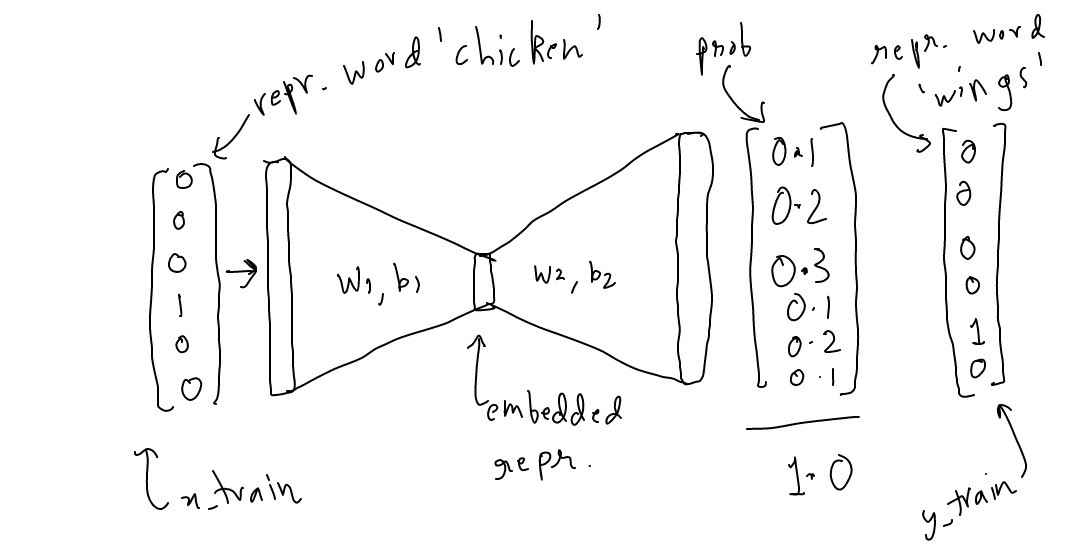

In [13]:
# observe the weights and biases optimised at the hidden layer

print (sess.run(w1))
print ('------------------------------------------------------------------')
print (sess.run(b1))

[[-0.76140708  1.35280657  1.83182585]
 [-0.61174148 -0.11747351  2.56534886]
 [-0.65255696  1.1134274   1.67728245]
 [ 2.52326298  0.10152612 -0.37655416]
 [-1.41134727 -1.44659984 -1.06104612]]
------------------------------------------------------------------
[ 0.27306375  0.11967633 -0.17888151]


In [14]:
# we multiply session variables w1 with input one hot vector and add the bias b1
# these values are similar to the predicted output values

vectors = sess.run(w1+b1)

print (vectors)

[[ -4.88343328e-01   1.47248292e+00   1.65294433e+00]
 [ -3.38677734e-01   2.20281631e-03   2.38646746e+00]
 [ -3.79493207e-01   1.23310375e+00   1.49840093e+00]
 [  2.79632664e+00   2.21202448e-01  -5.55435658e-01]
 [ -1.13828349e+00  -1.32692349e+00  -1.23992765e+00]]


In [15]:
# our idea is to calculate Euclidian distance for a letter to another and identify closest one to predict adjacent word

# defining Euclidean distance function

def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 100000
    min_index = -1
    
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [16]:
print(int2word[find_closest(word2int['raja'], vectors)])
print(int2word[find_closest(word2int['asians'], vectors)])
print(int2word[find_closest(word2int['spicy'], vectors)])

food
raja
raja


In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [18]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

food 0.223363639862
asians 0.914197704856
raja -0.456889410753
spicy -0.148966789141
like 0.97951057931


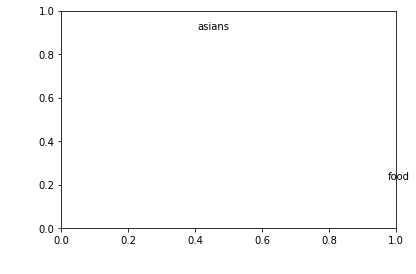

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))

plt.show()

Intuition: http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/